In [1]:
%pylab inline
#rcParams['text.usetex'] = True
#rcParams['text.latex.unicode'] = True
#rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}']
import scipy.integrate
from numba import jit
import matplotlib.patches as mpatch
from matplotlib.transforms import Bbox
from matplotlib.patches import FancyBboxPatch


Populating the interactive namespace from numpy and matplotlib


In [5]:
inc = np.loadtxt("inc.txt")
inc40rel = np.loadtxt("inc_40rel.txt")
inc80rel = np.loadtxt("inc_80rel.txt")

In [12]:
refl40rel = np.loadtxt("refl_40rel.txt")
refl80rel = np.loadtxt("refl_80rel.txt")

refl40 = np.loadtxt("refl_40.txt")
refl10 = np.loadtxt("refl_10.txt")

x = np.linspace(2.93,5, len(refl40rel))

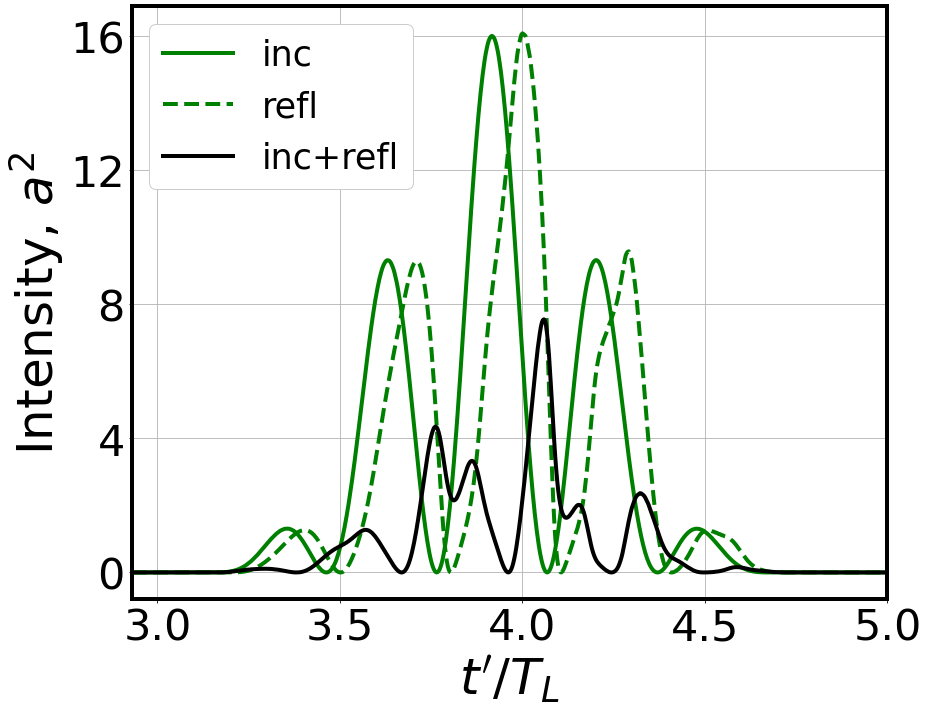

In [21]:
fig = plt.figure(figsize=(13,10))


#plot(x, inc80rel**2, label='inc', color='green', lw=4)
#plot(x, refl80rel**2, label='refl', color='green', linestyle='dashed', lw=4)
#plot(x, (inc80rel+refl80rel)**2, label='inc+refl', color='black', lw=4)
plot(x, inc40rel**2, label='inc', color='green', lw=4)
plot(x, refl40rel**2, label='refl', color='green', linestyle='dashed', lw=4)
plot(x, (inc40rel+refl40rel)**2, label='inc+refl', color='black', lw=4)

plt.grid()
legend = plt.legend(loc='upper left', fontsize=35)
legend.get_frame().set_alpha(None)
legend.get_frame().set_facecolor((1, 1, 1, 1))

for spine in plt.gca().spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(4)

xlim(2.93,5)

xticks = np.array([3., 3.5, 4., 4.5, 5.])
plt.xticks(xticks, xticks, fontsize=43)

yticks = np.array([0, 4, 8, 12, 16])
#yticks = np.array([0, 160, 320, 480, 640, 800])

plt.yticks(yticks, yticks, fontsize=43)

plt.ylabel("Intensity, $a^2$", fontsize=50)

plt.xlabel("$t'/T_L$", fontsize=50)
fig.tight_layout()
#plt.savefig("intensity_ultrarelativistic.pdf", format='pdf')
plt.savefig("intensity_relativistic.pdf", format='pdf')

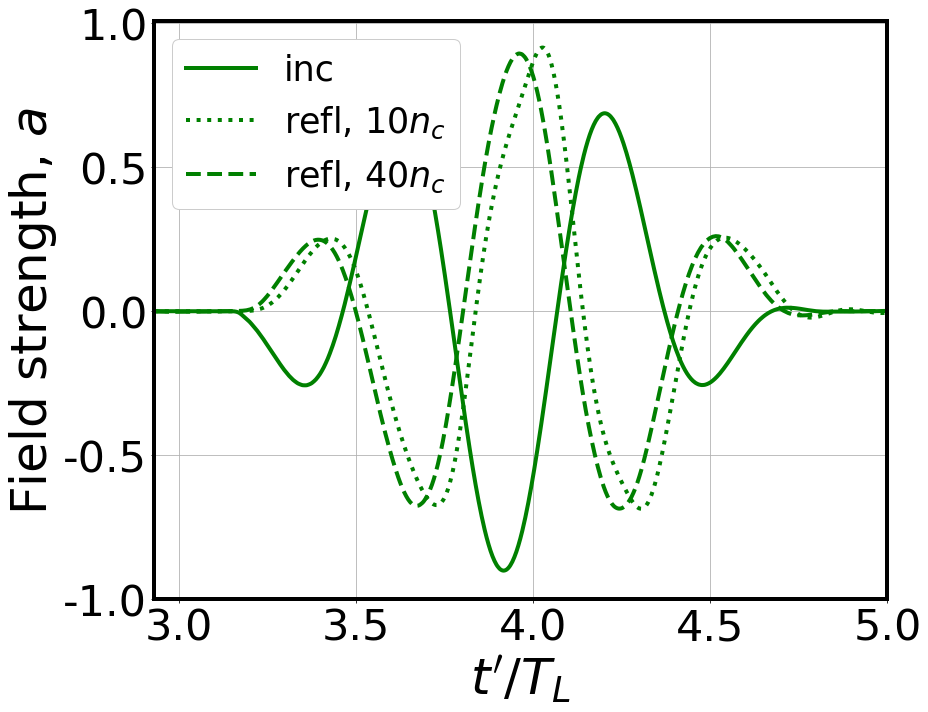

In [29]:
fig = plt.figure(figsize=(13,10))

#plot(x, inc**2, label='inc', color='green', lw=4)
#plot(x, (inc+refl10)**2, label='inc+refl, $10 n_c$', color='black', lw=4)
#plot(x, (inc+refl40)**2, label='inc+refl, $40 n_c$', color='black', lw=4, linestyle='dashed')

plot(x, inc, label='inc', color='green', lw=4)
plot(x, refl10, label='refl, $10 n_c$', color='green', lw=4, linestyle='dotted')
plot(x, refl40, label='refl, $40 n_c$', color='green', lw=4, linestyle='dashed')


plt.grid()
legend = plt.legend(loc='upper left', fontsize=35)
legend.get_frame().set_alpha(None)
legend.get_frame().set_facecolor((1, 1, 1, 1))

xlim(2.93,5)


xticks = np.array([3., 3.5, 4., 4.5, 5.])
plt.xticks(xticks, xticks, fontsize=43)

yticks = np.array([-1., -0.5, 0.0, 0.5, 1.])
#yticks = np.array([.0, .3, .6, .9])

plt.yticks(yticks, yticks, fontsize=43)

plt.ylabel("Field strength, $a$", fontsize=50)
#plt.ylabel("Intensity, $a^2$", fontsize=50)

for spine in plt.gca().spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(4)

plt.xlabel("$t'/T_L$", fontsize=50)
fig.tight_layout()
plt.savefig("field_linear.pdf", format='pdf')
#plt.savefig("intensity_linear.pdf", format='pdf')

In [6]:
x_left = np.loadtxt("x_left.txt")
x_right = np.loadtxt("x_right.txt")

sine_left = np.loadtxt("sine_left.txt")
sine_right = np.loadtxt("sine_right.txt")

cosine_left = np.loadtxt("cosine_left.txt")
cosine_right = np.loadtxt("cosine_right.txt")

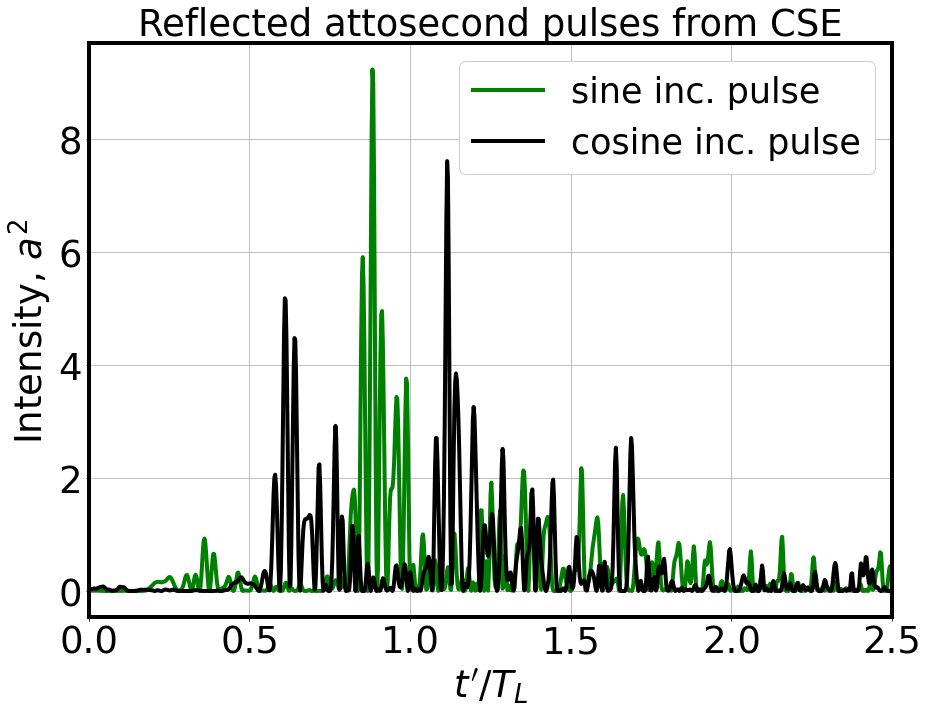

In [8]:
fig = plt.figure(figsize=(13,10))


#title("Reflected attosecond pulses from ROM", fontsize=37)
title("Reflected attosecond pulses from CSE", fontsize=37)
#plot(x_left, sine_left, label='sine inc. pulse', color='green', lw=4)
#plot(x_left, cosine_left, label='cosine inc. pulse', color='black', lw=4)
plot(x_right, sine_right, label='sine inc. pulse', color='green', lw=4)
plot(x_right, cosine_right, label='cosine inc. pulse', color='black', lw=4)

plt.grid()
legend = plt.legend(loc='upper right', fontsize=35)
#legend = plt.legend(loc='upper left', fontsize=35)
legend.get_frame().set_alpha(None)
legend.get_frame().set_facecolor((1, 1, 1, 1))

for spine in plt.gca().spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(4)

#xlim(-0.1,3.5)
xlim(0.0,2.5)

#ylim(0,75)

plt.xticks(fontsize=37)

plt.yticks(fontsize=37)

plt.ylabel("Intensity, $a^2$", fontsize=37)

plt.xlabel("$t'/T_L$", fontsize=37)
fig.tight_layout()
#plt.savefig("rom.pdf", format='pdf')
plt.savefig("cse.pdf", format='pdf')

In [7]:
import pandas as pd

#refl = pd.read_csv("refl.csv", header=None)
#inc = pd.read_csv("inc.csv", header=None)
#both = pd.read_csv("both.csv", header=None)
refl = pd.read_csv("refl_u.csv", header=None)
inc = pd.read_csv("inc_u.csv", header=None)
both = pd.read_csv("both_u.csv", header=None)

In [8]:
x_refl = refl[0].values
y_refl = refl[1].values

x_inc = inc[0].values
y_inc = inc[1].values

x_both = both[0].values
y_both = both[1].values
y_both[np.where(x_both<3.1)]=2.16606498

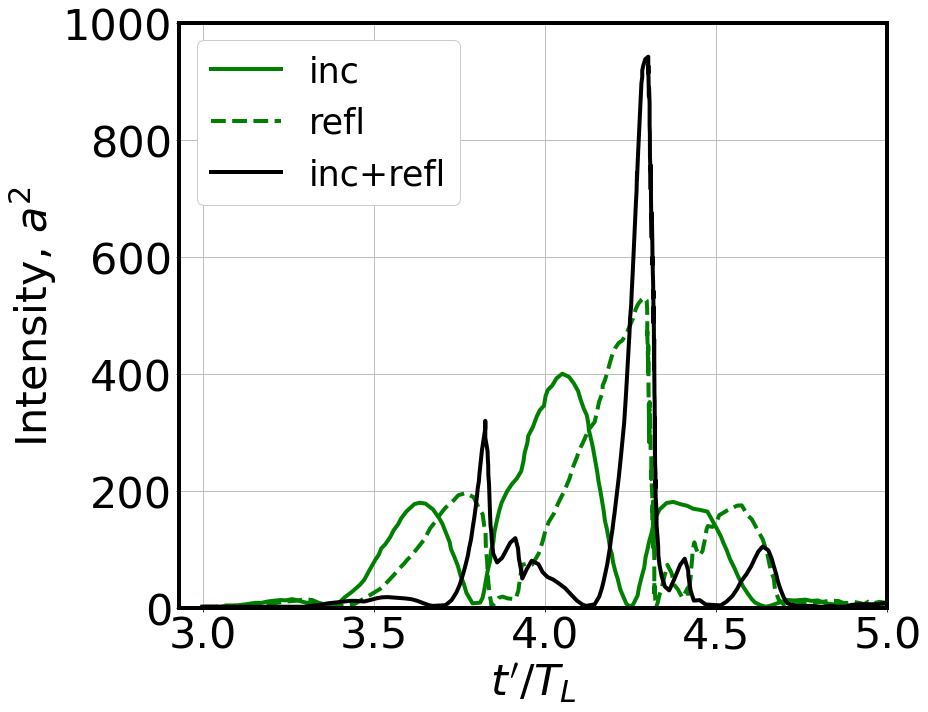

In [9]:
fig = plt.figure(figsize=(13,10))


inds=np.argsort(x_inc)
plot(x_inc[inds], y_inc[inds], label='inc', color='green', lw=4)
inds=np.argsort(x_refl)
plot(x_refl[inds], y_refl[inds], label='refl', color='green', linestyle='dashed', lw=4)
inds=np.argsort(x_both)
plot(x_both[inds], y_both[inds], label='inc+refl', color='black', lw=4)

plt.grid()
legend = plt.legend(loc='upper left', fontsize=35)
legend.get_frame().set_alpha(None)
legend.get_frame().set_facecolor((1, 1, 1, 1))

for spine in plt.gca().spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(4)

xlim(2.93,5)

#ylim(0,16)
ylim(0,1000)

xticks = np.array([3., 3.5, 4., 4.5, 5.])
plt.xticks(xticks, xticks, fontsize=43)

#yticks = np.array([0, 4, 8, 12, 16])
yticks = np.array([0, 200, 400, 600, 800, 1000])

plt.yticks(yticks, yticks, fontsize=43)

plt.ylabel("Intensity, $a^2$", fontsize=43)

plt.xlabel("$t'/T_L$", fontsize=43)
fig.tight_layout()
plt.savefig("intensity_ultrarelativistic.pdf", format='pdf')
#plt.savefig("intensity_relativistic.pdf", format='pdf')

In [3]:
# parameters of the model

# parameters of laser pulse components y and z
a0_y=0.9
a0_z=.9
phase_y=-pi/2
phase_z=phase_y+pi/2
duration=2.0*2*pi
# parameters of the foil
density=400.0
thickness=0.01*2*pi
alpha=density*thickness
epsilon=alpha*0.5
print(epsilon, 4*pi)

12.566370614359174 12.566370614359172


1.2296884295032817
1.123556847549308


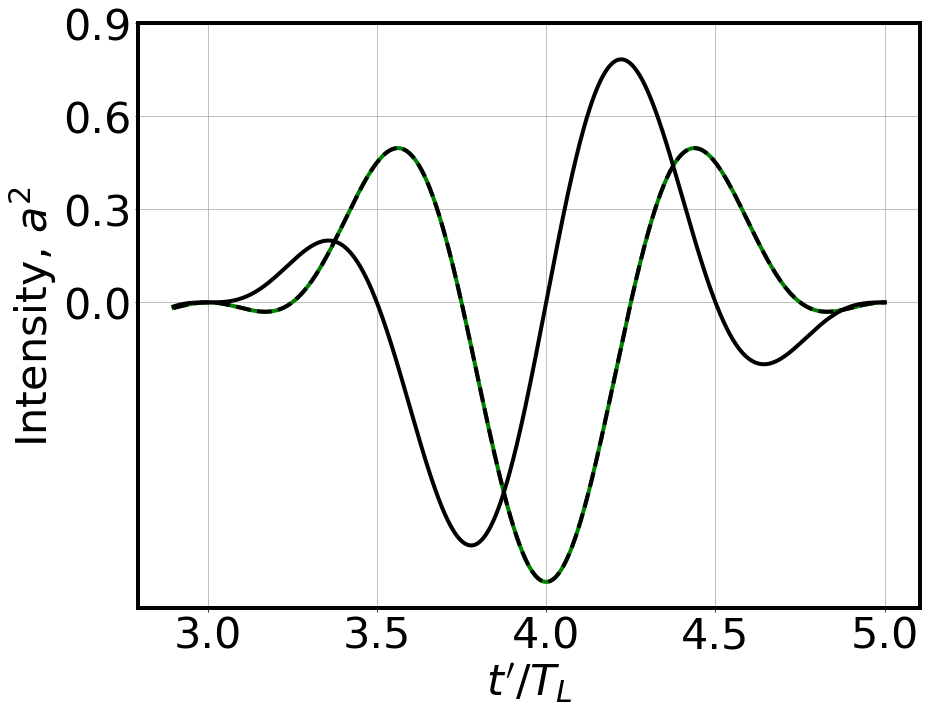

In [9]:
# pulse shapes functions
def pulse_y(xi):
    #if((xi)>=3.0*2*pi) and ((xi)<5.0*2*pi):
    toret = a0_y*sin(pi*(xi)/duration)**2*sin(xi-duration/2+phase_y)
    #else:
    #    toret = 0.0
    return toret


def pulse_2(xi):
    #if((xi)>=3.0*2*pi) and ((xi)<5.0*2*pi):
    toret = a0_y*sin(pi*(xi)/duration)**2*sin(xi-duration/2+phase_y+pi/2)
    #    toret = 0.0
    return toret

def pulse_4(xi):
    #if((xi)>=3.0*2*pi) and ((xi)<5.0*2*pi):
    toret = a0_y*sin(pi*(xi)/duration)**2*sin(xi-duration/2+phase_y+2*pi)
    #else:
    #    toret = 0.0
    return toret

x=linspace(3.9*2*pi,6*2*pi, 1000)
pulsey=zeros(len(x))
pulse2=zeros(len(x))
pulse4=zeros(len(x))

for n,xx in enumerate(x):
    #print(n,xx)
    pulsey[n]=pulse_y(xx)
    pulse2[n]=pulse_2(xx)
    pulse4[n]=pulse_4(xx)
    
    
fig = plt.figure(figsize=(13,10))

plot((x-2*pi)/2/pi, pulsey, label='inc', color='green', lw=4)
plot((x-2*pi)/2/pi, pulse2, label='inc+refl, $2 n_c$', color='black', lw=4)
plot((x-2*pi)/2/pi, pulse4, label='inc+refl, $40 n_c$', color='black', lw=4, linestyle='dashed')

#plot((x-2*pi)/2/pi, pulsey, label='inc', color='green', lw=4)
#plot((x-2*pi)/2/pi, pulse2, label='refl, $2 n_c$', color='green', lw=4, linestyle='dotted')
#plot((x-2*pi)/2/pi, pulse4, label='refl, $40 n_c$', color='green', lw=4, linestyle='dashed')


plt.grid()
#legend = plt.legend(loc='upper left', fontsize=35)
#legend.get_frame().set_alpha(None)
#legend.get_frame().set_facecolor((1, 1, 1, 1))

#xlim(2.93,5)

#ylim(-1.,1.1)
#ylim(0,0.9)

xticks = np.array([3., 3.5, 4., 4.5, 5.])
plt.xticks(xticks, xticks, fontsize=43)

#yticks = np.array([-1., -0.5, 0.0, 0.5, 1.])
yticks = np.array([.0, .3, .6, .9])

plt.yticks(yticks, yticks, fontsize=43)

#plt.ylabel("Field strength, $a$", fontsize=43)
plt.ylabel("Intensity, $a^2$", fontsize=43)

for spine in plt.gca().spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(4)

plt.xlabel("$t'/T_L$", fontsize=43)
fig.tight_layout()
#plt.savefig("field_linear.pdf", format='pdf')
plt.savefig("intensity_linear.pdf", format='pdf')
res = np.sqrt((pulse2+pulsey)**2)
print(np.max(res[:res.shape[0]//2]))
print(np.max(res[res.shape[0]//2:]))